In [1]:
#Importación de librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Configuracón general del notebook
%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

#Estilo y tamaño de los gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="whitegrid")

In [2]:
#Lectura del CSV con los datos a explorar
datos = pd.read_csv('DATA/train.csv')

In [3]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
selected_words_singular=['fire','flood','inundate','earthquake','quake','deluge','euption','twister','tornado','hurricane', 'landslide','typhoon','wildfire','forest fire','drought','avalanche','urgent','important','danger','warrning','help','evacuation']

In [5]:
selected_words_plural=['fires','floods', 'earthquakes','quakes','deluges','rashes','tornadoes','hurricanes', 'landslides','typhoons','wildfires','forest fires','droughts','avalanches']

In [6]:
selected_words_other=['heat wave','died','flooding','flooded','damage','urgent','important','danger','warrning','help','evacuation']

In [7]:
selected_words = selected_words_singular + selected_words_plural + selected_words_other

In [8]:
datos['text'] = datos['text'].str.lower()
datos['text'] = datos['text'].str.replace(r'[^\w\s]+', '')
datos['counts'] = datos['text'].str.len()
datos['totalwords'] = datos['text'].str.split().str.len()

In [9]:
datos['words'] = datos.text.str.strip().str.split('[\W_]+')
datos.head()

,id,keyword,location,text,target,counts,totalwords,words
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,68,13,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,37,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,130,22,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,63,8,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,86,16,"[just, got, sent, this, photo, from, ruby, ala..."


In [10]:
s = set(selected_words)
out = datos.assign(matches=[len(set(el) & s) for el in datos.words])
out.head()

,id,keyword,location,text,target,counts,totalwords,words,matches
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,68,13,"[our, deeds, are, the, reason, of, this, earth...",1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,37,7,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,130,22,"[all, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,63,8,"[13000, people, receive, wildfires, evacuation...",2
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,86,16,"[just, got, sent, this, photo, from, ruby, ala...",1


In [11]:
SinMatchesConTarget = out[(out['target'] == 1) & (out['matches'] == 0)]

In [12]:
pd.set_option('display.max_colwidth', -1)
SinMatchesConTarget.head()

,id,keyword,location,text,target,counts,totalwords,words,matches
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,49,5,"[bbcmtd, wholesale, markets, ablaze, httptcolhyxeohy6c]",0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set ablaze in aba httptco2nndbgwyei,1,73,9,"[africanbaze, breaking, newsnigeria, flag, set, ablaze, in, aba, httptco2nndbgwyei]",0
37,55,ablaze,World Wide!!,inec office in abia set ablaze httptco3imaomknna,1,49,7,"[inec, office, in, abia, set, ablaze, httptco3imaomknna]",0
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set ablaze santa cruz ûó head of the st elizabeth police superintende httptcowdueaj8q4j,1,128,19,"[barbados, bridgetown, jamaica, ûò, two, cars, set, ablaze, santa, cruz, ûó, head, of, the, st, elizabeth, police, superintende, httptcowdueaj8q4j]",0
50,73,ablaze,"Sheffield Township, Ohio",deputies man shot before brighton home set ablaze httptcogwnrhmso8k,1,67,9,"[deputies, man, shot, before, brighton, home, set, ablaze, httptcogwnrhmso8k]",0


In [13]:
asd = out.groupby(['target', 'matches', 'totalwords'])["id"].count().reset_index(name="cantidad")

In [14]:
asd2 = asd[['target','matches','totalwords','cantidad']]

In [15]:
asd2.head()

,target,matches,totalwords,cantidad
0,0,0,1,12
1,0,0,2,34
2,0,0,3,60
3,0,0,4,95
4,0,0,5,122


In [40]:
asd2['Representa'] = "NO Desastre"

In [41]:
asd2.loc[asd2['target'] == 1, 'Representa'] = "Desastre"

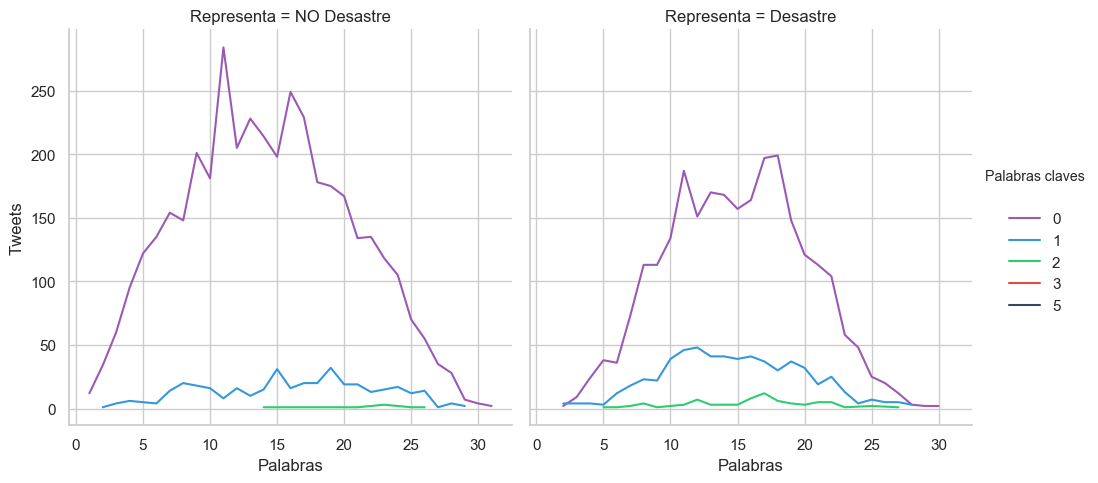

In [42]:
flatui = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]
g = sns.relplot(x="totalwords", y="cantidad", col="Representa", palette=flatui,  hue="matches", kind="line", data=asd2)

g._legend.texts[0].set_text("")
g._legend.set_title("Palabras claves")
g.set(xlabel='Palabras', ylabel='Tweets')

In [ ]:
#==========================================================================
#========================================================================== 
#==========================================================================

In [ ]:
# FIN DE LA PRIMER PRÁCTICA DEL FINGER 1.

In [17]:
#sns.set(style="white", color_codes=True)
#g = (sns.jointplot(asd2['totalwords'], asd2['counts'], kind="hex").set_axis_labels("x", "y"))

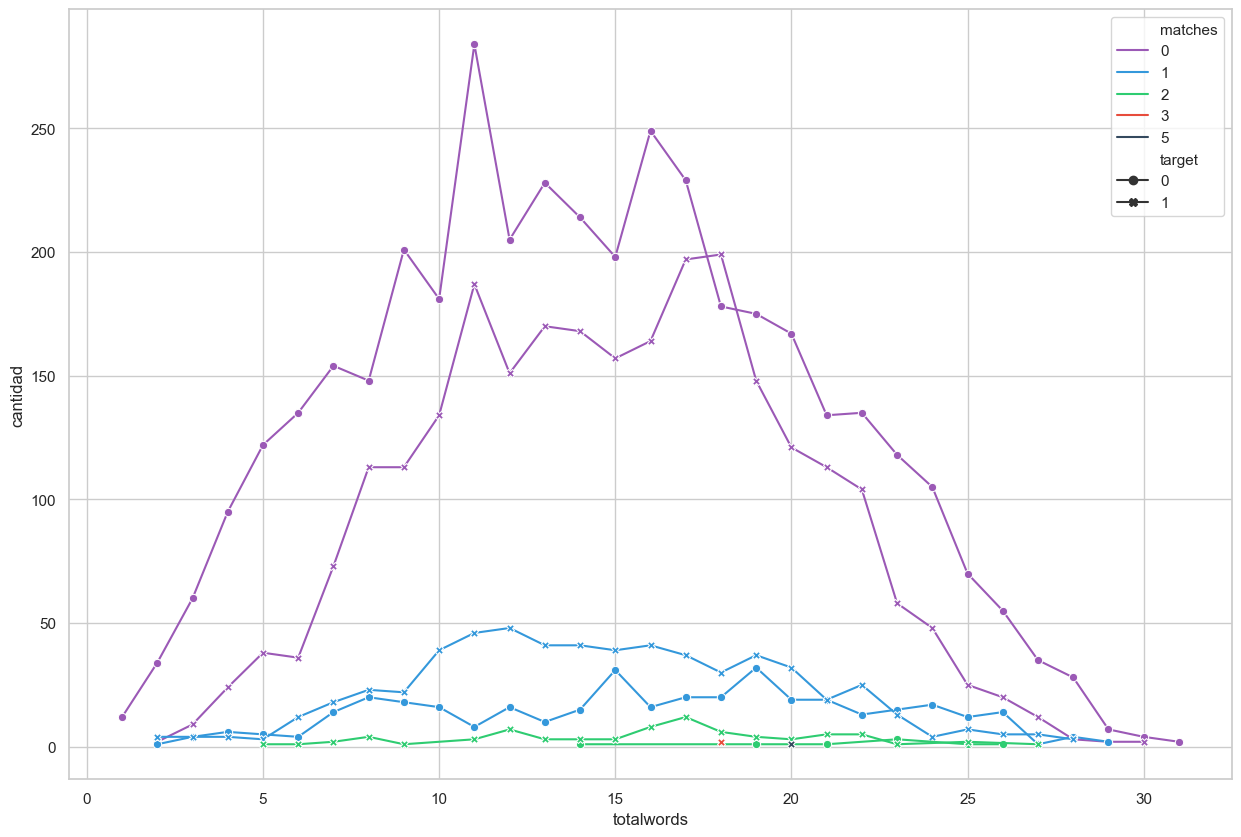

In [16]:
flatui = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]
ax = sns.lineplot(x="totalwords", y="cantidad", hue="matches", style="target", palette=flatui, markers=True, dashes=False, data=asd2)

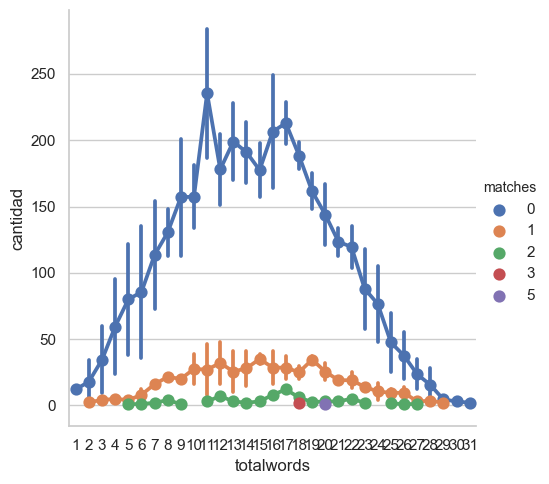

In [23]:
sns.catplot(x="totalwords", y="cantidad", hue="matches", kind="point", data=asd2);

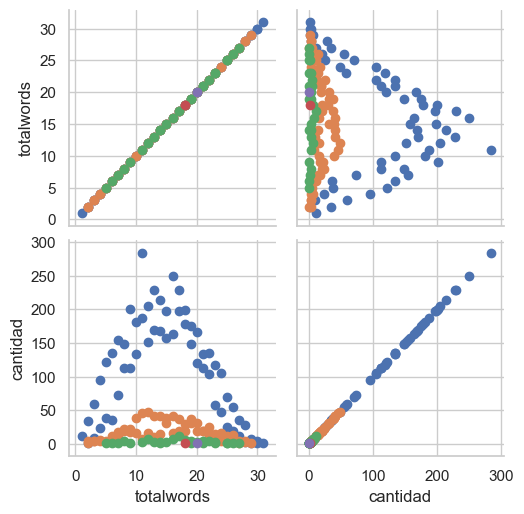

In [24]:
g = sns.PairGrid(asd2, vars=["totalwords", "cantidad"], hue="matches")
g.map(plt.scatter);

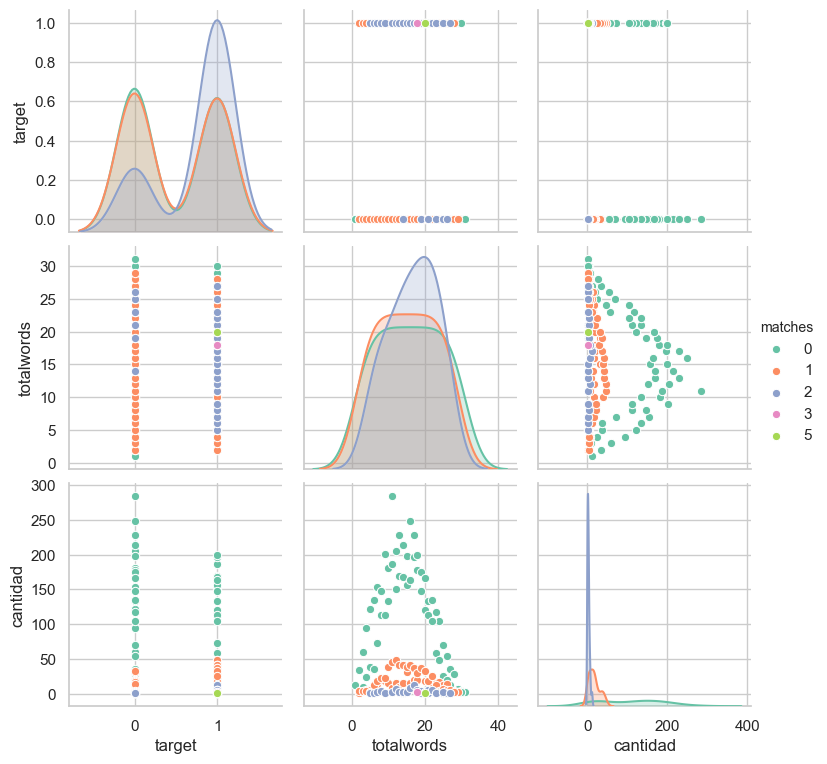

In [26]:
g = sns.pairplot(asd2, hue="matches", palette="Set2", diag_kind="kde", height=2.5)

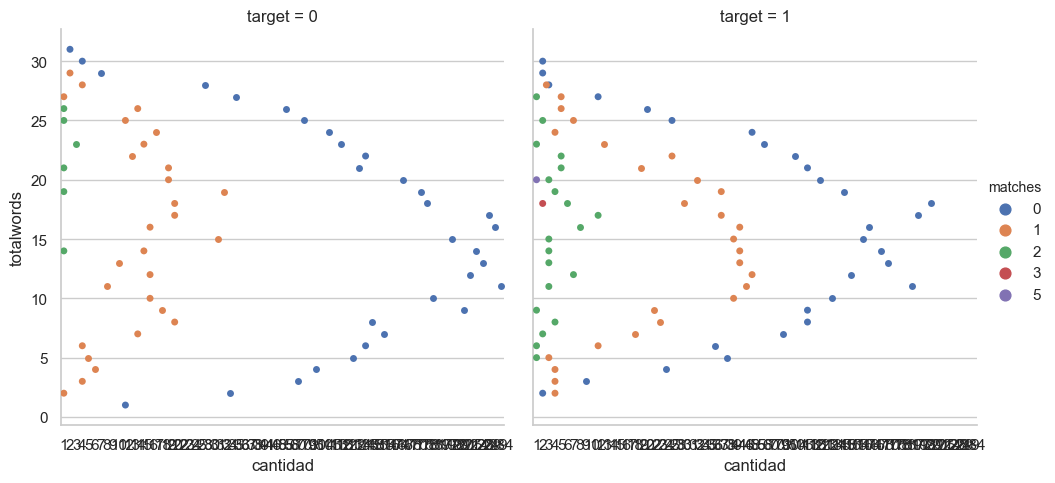

In [31]:
sns.catplot(x="cantidad", y="totalwords", hue="matches",
            col="target", aspect=1,
            kind="swarm", data=asd2);

In [37]:
#==========================================================================
#========================================================================== 
#==========================================================================

In [38]:
out['totalwords'].value_counts()

11    528
17    495
16    478
13    452
14    442
18    435
15    428
12    427
19    397
10    370
9     355
20    343
8     308
21    291
22    282
7     261
23    208
6     188
24    174
5     169
4     129
25    117
26     95
3      77
27     54
2      41
28     38
1      12
29     11
30      6
31      2
Name: totalwords, dtype: int64

In [38]:
datos['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [22]:
datos['location'].value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Sunshine Coast, Queensland      1
South Carolina, USA             1
Midwest City, OK                1
khanna                          1
LEALMAN, FLORIDA                1
Name: location, Length: 3341, dtype: int64

In [23]:
datos['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64